In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset in the pandas dataframe
df=pd.read_excel(r"daily_offers.xlsx")
# Read the first 5 rows from dataframe
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.shape    # Shape of the dataframe

(181673, 14)

* 181673 data points
* Each data point has 14 features

In [4]:
df.dtypes   # data type of each field

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

# DATA CLEANING

In [5]:
df['id'].unique().size  # Number of different values in the id column

181672

* Number of different values in the "id" column is just one less than the total number of data point we have. So we can conclude
it does not provide us any relevent information about the data. It act as a unique id in the table.

In [6]:
df.drop(columns=['id'],axis=1,inplace=True) # Droping the "id" column from the dataframe

In [7]:
df['material_ref'].unique().size    # Number of different values in the "material_ref" column

16564

In [8]:
df['material_ref'].isnull().sum()   # Number of missing values in the "material_ref" column

77919

In [9]:
(77919/181673)*100  # Percetage of missing values in the "material_ref" column

42.88969742339258

* Approx 43% of values are missing in the "material_ref" column. So we can drop this column.

In [10]:
df.drop(columns=['material_ref'],axis=1,inplace=True)   # droping the column "material_ref" from the dataframe

* item_date and delivery date has time stored in the timestamp formate. For analysis purpose we will convert the timestamp format data in python datetime object

In [11]:
df['item_date'].isnull().sum()  # Number of missing values in the "item_date" column

1

* 1 missing value in "item_date" column

In [12]:
df['item_date'].fillna(df['item_date'].mode()[0],inplace=True)  # imputing the missing value with the mode

In [13]:
df['delivery date'].isnull().sum()  # Number of missing values in the "delivery date" column

1

* 1 missing value in "delivery date" column

In [14]:
df['delivery date'].fillna(df['delivery date'].mode()[0],inplace=True)  # imputing the missing value with the mode

In [15]:
# Importing the datetime module from datetime library
from datetime import datetime

In [16]:
# Function to extract date from timestamp
def to_date(x):
    return datetime.fromtimestamp(x).date()

In [17]:
# Converting the timestamp to date
df['item_date']=df['item_date'].apply(to_date)  
df['delivery date']=df['delivery date'].apply(to_date)

In [18]:
# Checking number of missing values in each column
df[df.columns].isnull().sum()

item_date         0
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     0
selling_price     1
dtype: int64

* Column "customer","country","status","application","thickness" and "selling_price" contains null/missing values.

* If the column contain "Categorical value" we will replace null value with the mode. 

* If the column contain "Numerical value" we can replace with mean or median. 

In [19]:
df['customer'].unique().size    # Number of unique values in the "customer" column

1170

In [20]:
df['customer'].fillna(df['customer'].mode()[0],inplace=True)    # Filling the missing values with mode

In [21]:
df['country'].unique().size     # Number of unique values in the "country" column

18

In [22]:
df['country'].fillna(df['country'].mode()[0],inplace=True)      # Filling the missing values with mode

In [23]:
df['status'].unique().size      # Number of unique values in the "status" column

10

In [24]:
df['status'].fillna(df['status'].mode()[0],inplace=True)    # Filling the missing values with mode

In [25]:
df['application'].unique().size     # Number of unique values in the "application" column

31

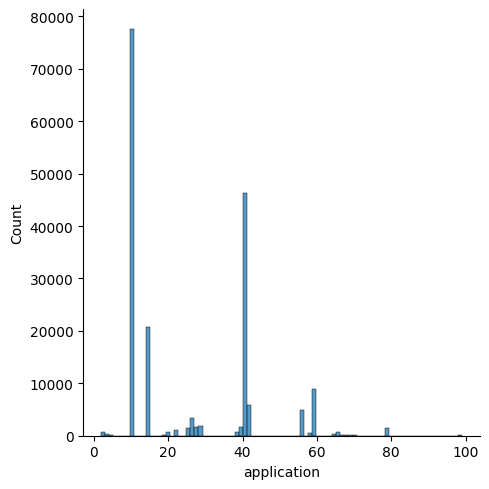

In [26]:
sns.displot(df['application'])

In [27]:
df['application'].mode()[0]

10.0

* Application with number 10 has occured the most time 

In [28]:
df['application'].fillna(df['application'].mode()[0],inplace=True)      # imputing with mode

In [29]:
df['thickness'].describe()

count    181672.000000
mean          2.564827
std           6.572321
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

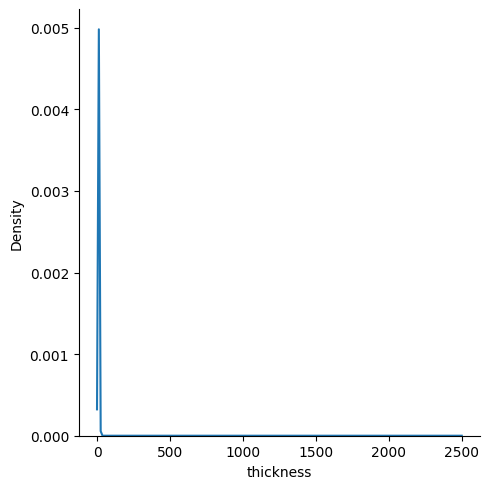

In [30]:
sns.displot(df['thickness'],kind='kde')

In [31]:
# Since the data in the column is right skewed we will impute the missing value with the median
df['thickness'].fillna(df['thickness'].median(),inplace=True)

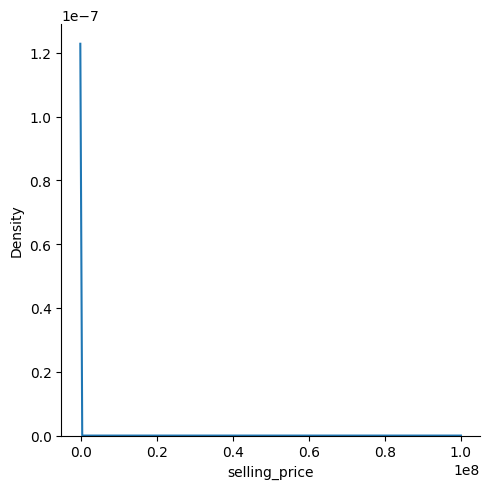

In [32]:
sns.displot(df['selling_price'],kind='kde')

In [33]:
df['selling_price'].describe()

count    1.816720e+05
mean     1.918036e+03
std      3.317956e+05
min     -1.160000e+03
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [34]:
# Since the data in the column is left skewed we can impute the missing values with 25th percentile or median, we will impute with
# 25th percentile
df['selling_price'].fillna(df['selling_price'].quantile(0.25),inplace=True)

In [35]:
# We saw that selling Price also contain negative value which is user error
# We will also replace these values with 25 percentile value
df.loc[df['selling_price']<0,'selling_price']=df['selling_price'].quantile(0.25)

In [36]:
df[df.columns].isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

* We have cleaned all the columns and imputed the missing values with the appropriate method. 

In [37]:
# Converting the quantity tons column data type to float from string
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')
# Filling the NaN value with the mean of the column
df['quantity tons'].fillna(df['quantity tons'].mean(),inplace=True)

# EDA

* Sale on each day 

In [38]:
df.groupby(by='item_date')['selling_price'].sum()

item_date
1970-08-20         1046.0
1970-08-22          795.0
1970-08-23    348458215.3
Name: selling_price, dtype: float64

<AxesSubplot: title={'center': 'sales analysis of each day'}, xlabel='sales date', ylabel='total sale'>

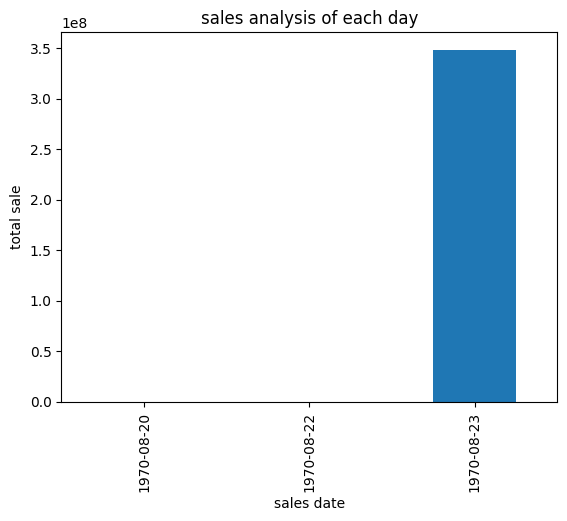

In [39]:
df.groupby(by='item_date')['selling_price'].sum().plot(kind='bar',xlabel='sales date',ylabel='total sale',title='sales analysis of each day')

* From the above diagram we can conclude that maximum sale was on 1970-08-20.

In [40]:
df.groupby(by='item_date')['item type'].count()

item_date
1970-08-20         1
1970-08-22         1
1970-08-23    181671
Name: item type, dtype: int64

<AxesSubplot: title={'center': 'sales per day analysis'}, xlabel='sales', ylabel='number of item sold'>

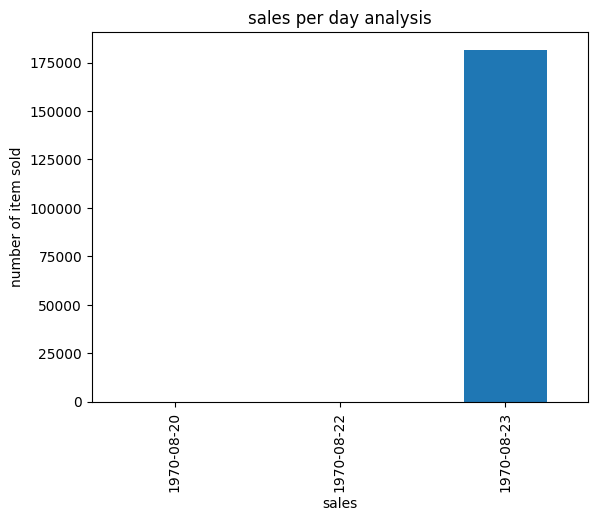

In [41]:
df.groupby(by='item_date')['item type'].count().plot(kind='bar',xlabel='sales',ylabel='number of item sold',title='sales per day analysis')

* From the above analysis we can conclude that on 1970-08-20 and 1970-08-22 only one item sold each day and rest of the 
transaction were done on 1970-08-23

<AxesSubplot: title={'center': 'Sales analysis by Country Code'}, xlabel='Country Code', ylabel='Total Sale'>

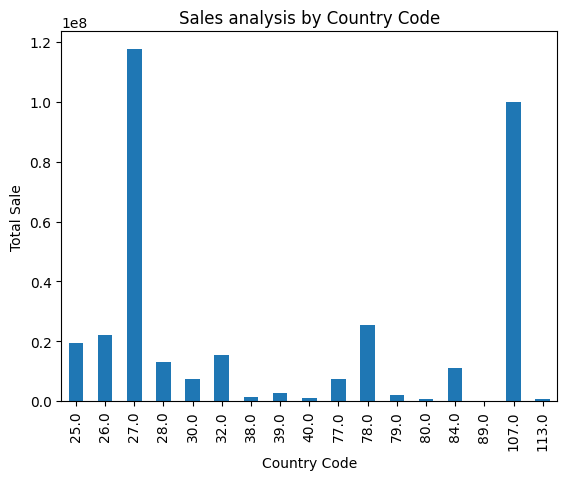

In [42]:
df.groupby(by='country')['selling_price'].sum().plot(kind='bar',xlabel='Country Code',ylabel='Total Sale',title='Sales analysis by Country Code')

* Maximum sales is corresponding to country with country code 27

In [43]:
df.groupby(by='country')['item type'].unique()

country
25.0                 [W, S, WI, PL, Others]
26.0     [W, S, Others, PL, WI, IPL, SLAWR]
27.0                 [S, W, PL, Others, WI]
28.0                        [W, S, PL, IPL]
30.0                         [WI, W, S, PL]
32.0                 [S, W, Others, PL, WI]
38.0                                    [S]
39.0                                 [W, S]
40.0                                    [S]
77.0                         [S, W, PL, WI]
78.0                         [W, S, WI, PL]
79.0                                [S, WI]
80.0                                 [W, S]
84.0                                 [W, S]
89.0                                 [S, W]
107.0                                   [S]
113.0                                   [S]
Name: item type, dtype: object

* Unique items sold to each country

<AxesSubplot: title={'center': 'Unique items sold in each country'}, xlabel='Country Code', ylabel='Unique item sold'>

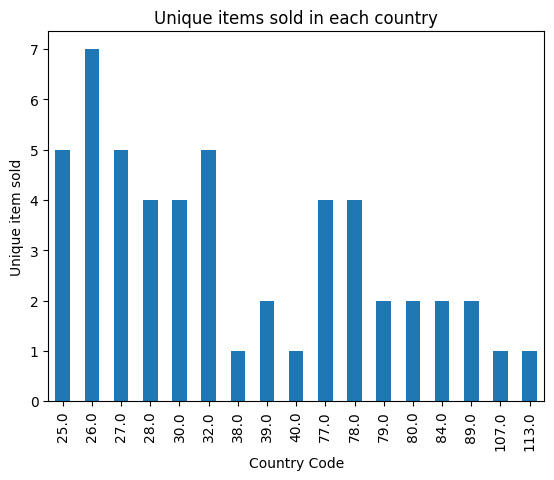

In [44]:
df.groupby(by='country')['item type'].nunique().plot(kind='bar',xlabel='Country Code',ylabel='Unique item sold',title='Unique items sold in each country')

* Maximum number of Unique item are sold to country with country code 26

<AxesSubplot: title={'center': 'Country_Code vs Mean_Thickness'}, xlabel='Country Code', ylabel='Mean Thickness'>

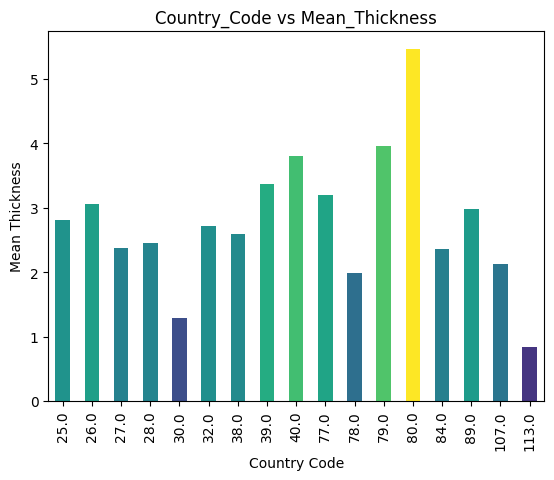

In [45]:
thickness_mean=df.groupby(by='country')['thickness'].mean()
cmap = plt.cm.get_cmap('viridis')
thickness_mean.plot(kind='bar', color=cmap(thickness_mean / thickness_mean.max()),xlabel='Country Code',ylabel='Mean Thickness',title='Country_Code vs Mean_Thickness')

<AxesSubplot: title={'center': 'Country_Code vs Mean_Width'}, xlabel='Country Code', ylabel='Mean Width'>

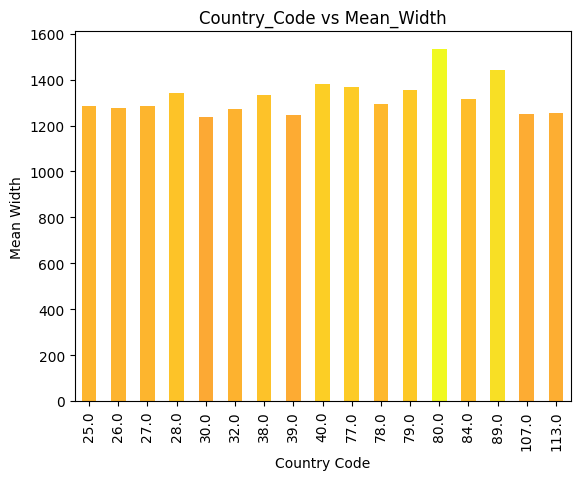

In [46]:
width_mean=df.groupby(by='country')['width'].mean()
cmap=plt.cm.get_cmap('plasma')
width_mean.plot(kind='bar',color=cmap(width_mean/width_mean.max()),xlabel='Country Code',ylabel='Mean Width',title='Country_Code vs Mean_Width')

<AxesSubplot: title={'center': 'Item_Type vs Total_Sale'}, xlabel='Item Type', ylabel='Total Sales Price'>

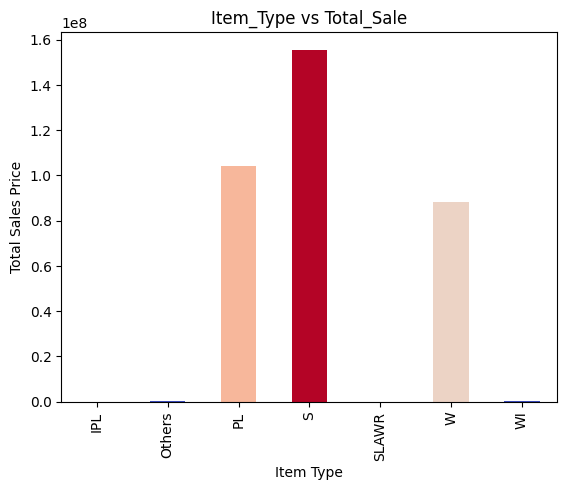

In [47]:
item_type=df.groupby(by='item type')['selling_price'].sum()
cmap=plt.cm.get_cmap('coolwarm')
item_type.plot(kind='bar',color=cmap(item_type/item_type.max()),xlabel='Item Type',ylabel='Total Sales Price',title='Item_Type vs Total_Sale')

* Total selling price distribution corresponding to each item

<AxesSubplot: title={'center': 'Item_Type vs Number_Of_Time_Sold'}, xlabel='Item Type', ylabel='Frequency of selling'>

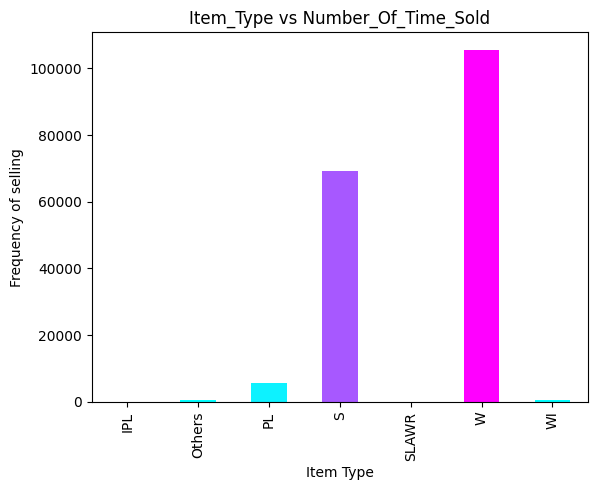

In [48]:
item_freq=df.groupby(by='item type')['selling_price'].count()
item_freq.plot(kind='bar',color=plt.cm.cool(item_freq/item_freq.max()),xlabel='Item Type',ylabel='Frequency of selling',title='Item_Type vs Number_Of_Time_Sold')

* The item with type "W" is sold maximum times

In [49]:
item_freq

item type
IPL           27
Others       610
PL          5660
S          69236
SLAWR          1
W         105615
WI           524
Name: selling_price, dtype: int64

* Item with type "SLAWR" is only sold Once

<AxesSubplot: title={'center': 'Item_Type vs Mean_Thickness'}, xlabel='Item Type', ylabel='Mean Tickness'>

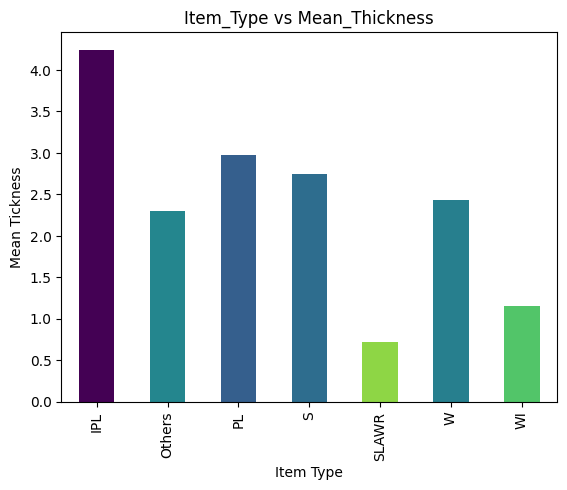

In [50]:
item_thickness=df.groupby(by='item type')['thickness'].mean()
item_thickness.plot(kind='bar',color=plt.cm.viridis_r(item_thickness/item_thickness.max()),xlabel='Item Type',ylabel='Mean Tickness',title='Item_Type vs Mean_Thickness')

* Mean thickness of the item type "IPL" is maximum

<AxesSubplot: title={'center': 'Item_type vs Mean_width'}, xlabel='Item Type', ylabel='Mean Width'>

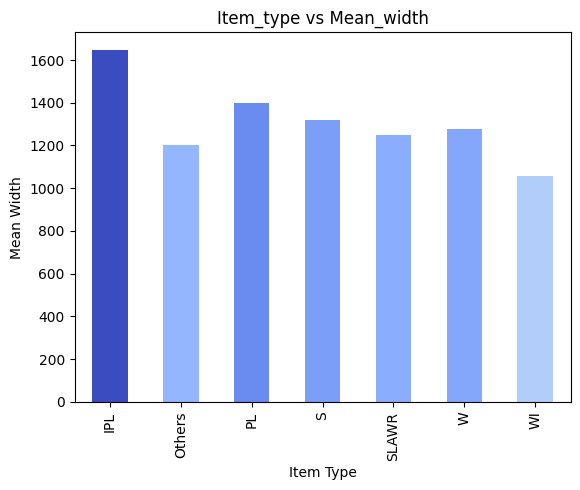

In [51]:
item_width=df.groupby(by='item type')['width'].mean()
item_width.plot(kind='bar',color=plt.cm.coolwarm_r(item_width/item_width.max()),xlabel='Item Type',ylabel='Mean Width',title='Item_type vs Mean_width')

<AxesSubplot: title={'center': 'Item_type vs Total_qunatity_sold'}, xlabel='item type', ylabel='Quantity Sold in tons'>

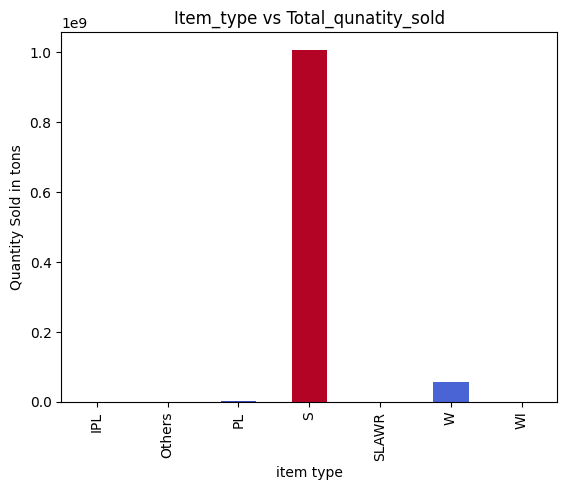

In [52]:
item_quantity=df.groupby(by='item type')['quantity tons'].sum()
item_quantity.plot(kind='bar',color=plt.cm.coolwarm(item_quantity/item_quantity.max()),x='Item Type',ylabel='Quantity Sold in tons',title='Item_type vs Total_qunatity_sold')

* Item with type "S" is sold in maximum quantity 

# Data Modeling

In [53]:
X=df.iloc[:,:-1]    # Storing all independent features
Y=df.iloc[:,-1]     # Storing dependent feature

In [54]:
X.head(3)   # independent features

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date
0,1970-08-23,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,1970-08-23
1,1970-08-23,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1970-08-23
2,1970-08-23,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,1970-08-23


In [55]:
Y.head(3)   # dependent features

0     854.00
1    1047.00
2     644.33
Name: selling_price, dtype: float64

In [56]:
# Different values in the item_date column and delivery date column
print(X['item_date'].nunique())
print(X['delivery date'].nunique())

3
3


* From the above analysis we saw that most of the orffers are made on 1970-08-23 and delivered same day. So we can drop it as it
does not provide us with any valuable information in modeling the data 

In [57]:
X.drop(columns=['item_date','delivery date'],axis=1,inplace=True)   #Dropping the columns

In [58]:
# Number of different values in the customer column
X['customer'].nunique()

1169

In [59]:
# Number of different values in the product_ref column
X['product_ref'].nunique()

33

In [60]:
X['customer'].value_counts()    # Frequency count of different values

30157111.0    4989
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30271383.0       1
30356502.0       1
30357481.0       1
30156053.0       1
30271291.0       1
Name: customer, Length: 1169, dtype: int64

In [61]:
X['product_ref'].value_counts()     # Frequency count of different values

611993        45727
164141591     28785
640665        27375
1670798778    18916
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

* We will apply frequency encoding on customer and product_ref column.
* Since the frequency is biased, We will apply lograthmic transformation before applying frequency encoding to reduce bias.

In [62]:
# Applying frequency encoding on customer column
customer_freq=X['customer'].value_counts().to_dict()
customer_freq={k:np.log10(v) for k,v in customer_freq.items()}
X['customer']=X['customer'].map(customer_freq)

In [63]:
# Applying frequency encoding on product_ref column
product_ref_freq=X['product_ref'].value_counts().to_dict()
product_ref_freq={k:np.log10(v) for k,v in product_ref_freq.items()}
X['product_ref']=X['product_ref'].map(product_ref_freq)

In [64]:
# Frequency of different country code
X['country'].value_counts()

78.0     32112
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [65]:
# Frequency of different applicaton 
X['application'].value_counts()

10.0    77568
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: application, dtype: int64

In [66]:
# Applying frquency encoding on country column
country_freq=X['country'].value_counts().to_dict()
country_freq={k:np.log10(v) for k,v in country_freq.items()}
X['country']=X['country'].map(country_freq)

In [67]:
# Applying frequency encoding on application column
application_freq=X['application'].value_counts().to_dict()
application_freq={k:np.log10(v) for k,v in application_freq.items()}
X['application']=X['application'].map(application_freq)

In [68]:
# Apply one-hot-encoding on item_type and status column
item_type_encoded=pd.get_dummies(X['item type'],drop_first=False)
status_encoded=pd.get_dummies(X['status'],drop_first=False)

In [69]:
# Drop the column item type and status
X.drop(columns=['item type','status'],inplace=True,axis=1)

Text(0.5, 1.0, 'Quantity Distribution')

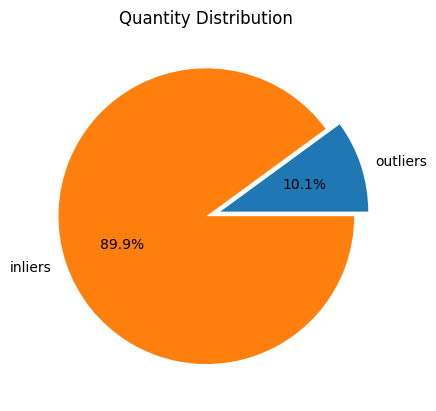

In [70]:
# Let's analysis the distribution of quantity tons column in the dataset
q1=X['quantity tons'].quantile(.25)
q3=X['quantity tons'].quantile(.75)
outlier_per=(X.loc[(X['quantity tons']<q1-q1*1.5) | (X['quantity tons']>q3+q3*1.5),'quantity tons'].shape[0])/(X.loc[:,'quantity tons'].shape[0])
li=np.array([outlier_per,1-outlier_per])
plt.pie(li,labels=['outliers','inliers'],explode=[0.1,0],autopct='%1.1f%%')
plt.title('Quantity Distribution')

* The above pie chart shows that 10.1% of the values in the column are outliers using the Inter Quartile Range as matric. So we 
need to change these value to some measure of central tendency

In [71]:
X['quantity tons'].describe()

count    1.816730e+05
mean     5.874926e+03
std      2.349075e+06
min     -2.000000e+03
25%      1.097037e+01
50%      3.036499e+01
75%      6.716130e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

* The above data shows that **mean**>**median**>**mode**. This mean that data is **positive/right skewed**.

Text(0.5, 1.0, 'Quantity Distribution')

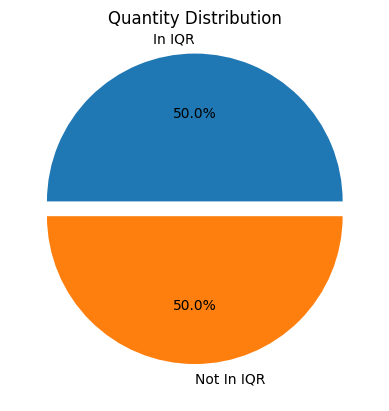

In [72]:
iqr_qunatity_tons=(X.loc[(X['quantity tons']>=q1) & (X['quantity tons']<=q3),'quantity tons']).shape[0]/(X['quantity tons'].shape[0])
li=[iqr_qunatity_tons,1-iqr_qunatity_tons]
plt.pie(li,labels=['In IQR','Not In IQR'],explode=[0.1,0],autopct='%1.1f%%')
plt.title('Quantity Distribution')

* 50% of the lies in the **IQR**. So median is good matric to use as a measure of central tendecy.

* In this case, 50% of the values are within the interquartile range (IQR),
it suggests that the dataset has a moderate degree of skewness.

* The **median** is a robust measure of central tendency, which means it is less affected by extreme values than the mean.
So, replacing the outliers with the median can help mitigate the effect of extreme values on the overall distribution.

* However, replacing outliers with the median may also affect the shape of the distribution and the overall variability of the data.

* Considering all the factors above we will not replace the **outliers** as they introduce variability in the dataset.

Text(0.5, 1.0, 'Thickness Distribution')

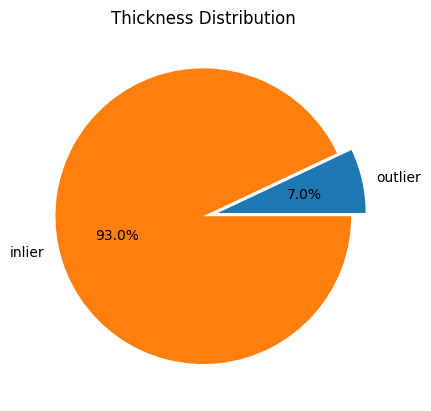

In [73]:
# Let's analysis the thickness column in the dataset
t_q1=X['thickness'].quantile(.25)
t_q3=X['thickness'].quantile(.75)
outlier_t=(X.loc[(X['thickness']<t_q1-t_q1*1.5) | (X['thickness']>t_q3+t_q3*1.5)].shape[0])/(X['thickness'].shape[0])
li=[outlier_t,1-outlier_t]
plt.pie(li,labels=['outlier','inlier'],autopct='%1.1f%%',explode=[0.1,0])
plt.title('Thickness Distribution')

* **7%** of the data points are outliers.

Text(0.5, 1.0, 'Thickness Distribution')

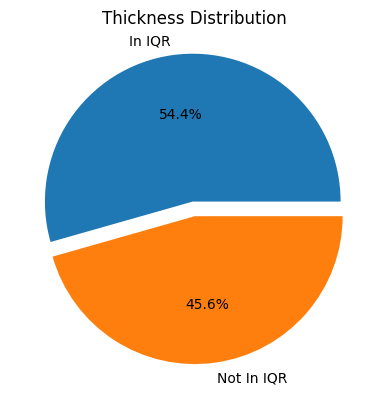

In [74]:
iqr_t=(X.loc[(X['thickness']>=t_q1) & (X['thickness']<=t_q3),'thickness'].shape[0])/(X['thickness'].shape[0])
li=[iqr_t,1-iqr_t]
plt.pie(li,labels=['In IQR','Not In IQR'],autopct='%1.1f%%',explode=[0.1,0])
plt.title('Thickness Distribution')

* Since **54.4%** of the data points lie in the **IQR** which is good indicator that data is normally distributed
and only **7%** of data is **outlier** which is good to introduce variability in the dataset.

Text(0.5, 1.0, 'Width Distribution')

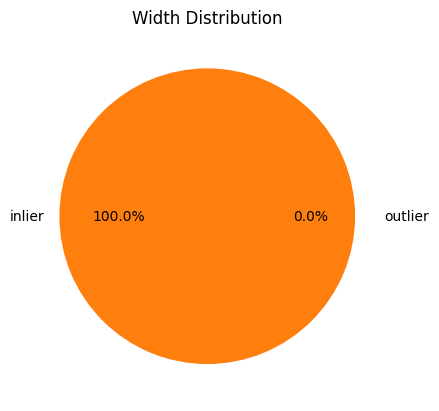

In [75]:
# Let's analysis the width column
w_q1=X['width'].quantile(0.25)
w_q3=X['width'].quantile(0.75)
outlier_w=(X.loc[(X['width']<w_q1-w_q1*1.5) | (X['width']>w_q3+w_q3*1.5),'width'].shape[0])/(X['width'].shape[0])
li=[outlier_w,1-outlier_w]
plt.pie(li,labels=['outlier','inlier'],autopct='%1.1f%%',explode=[0.1,0])
plt.title('Width Distribution')

In [76]:
outlier_w   # Percentage of outlier

0.0

In [77]:
X['width'].describe()

count    181673.000000
mean       1295.286724
std         261.631754
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

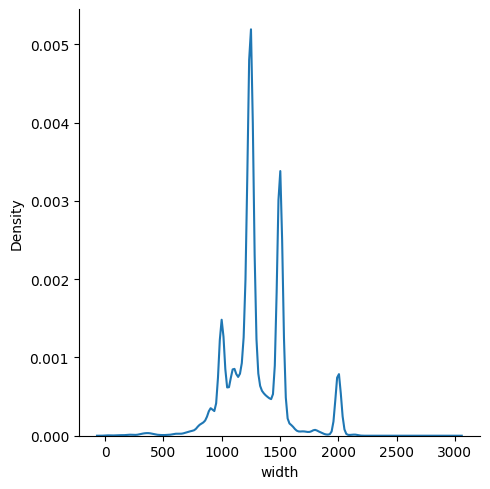

In [78]:
sns.displot(X['width'],kind='kde')      # Density plot for the width distribution

In [79]:
X=pd.concat([X,item_type_encoded,status_encoded],axis=1)

<AxesSubplot: >

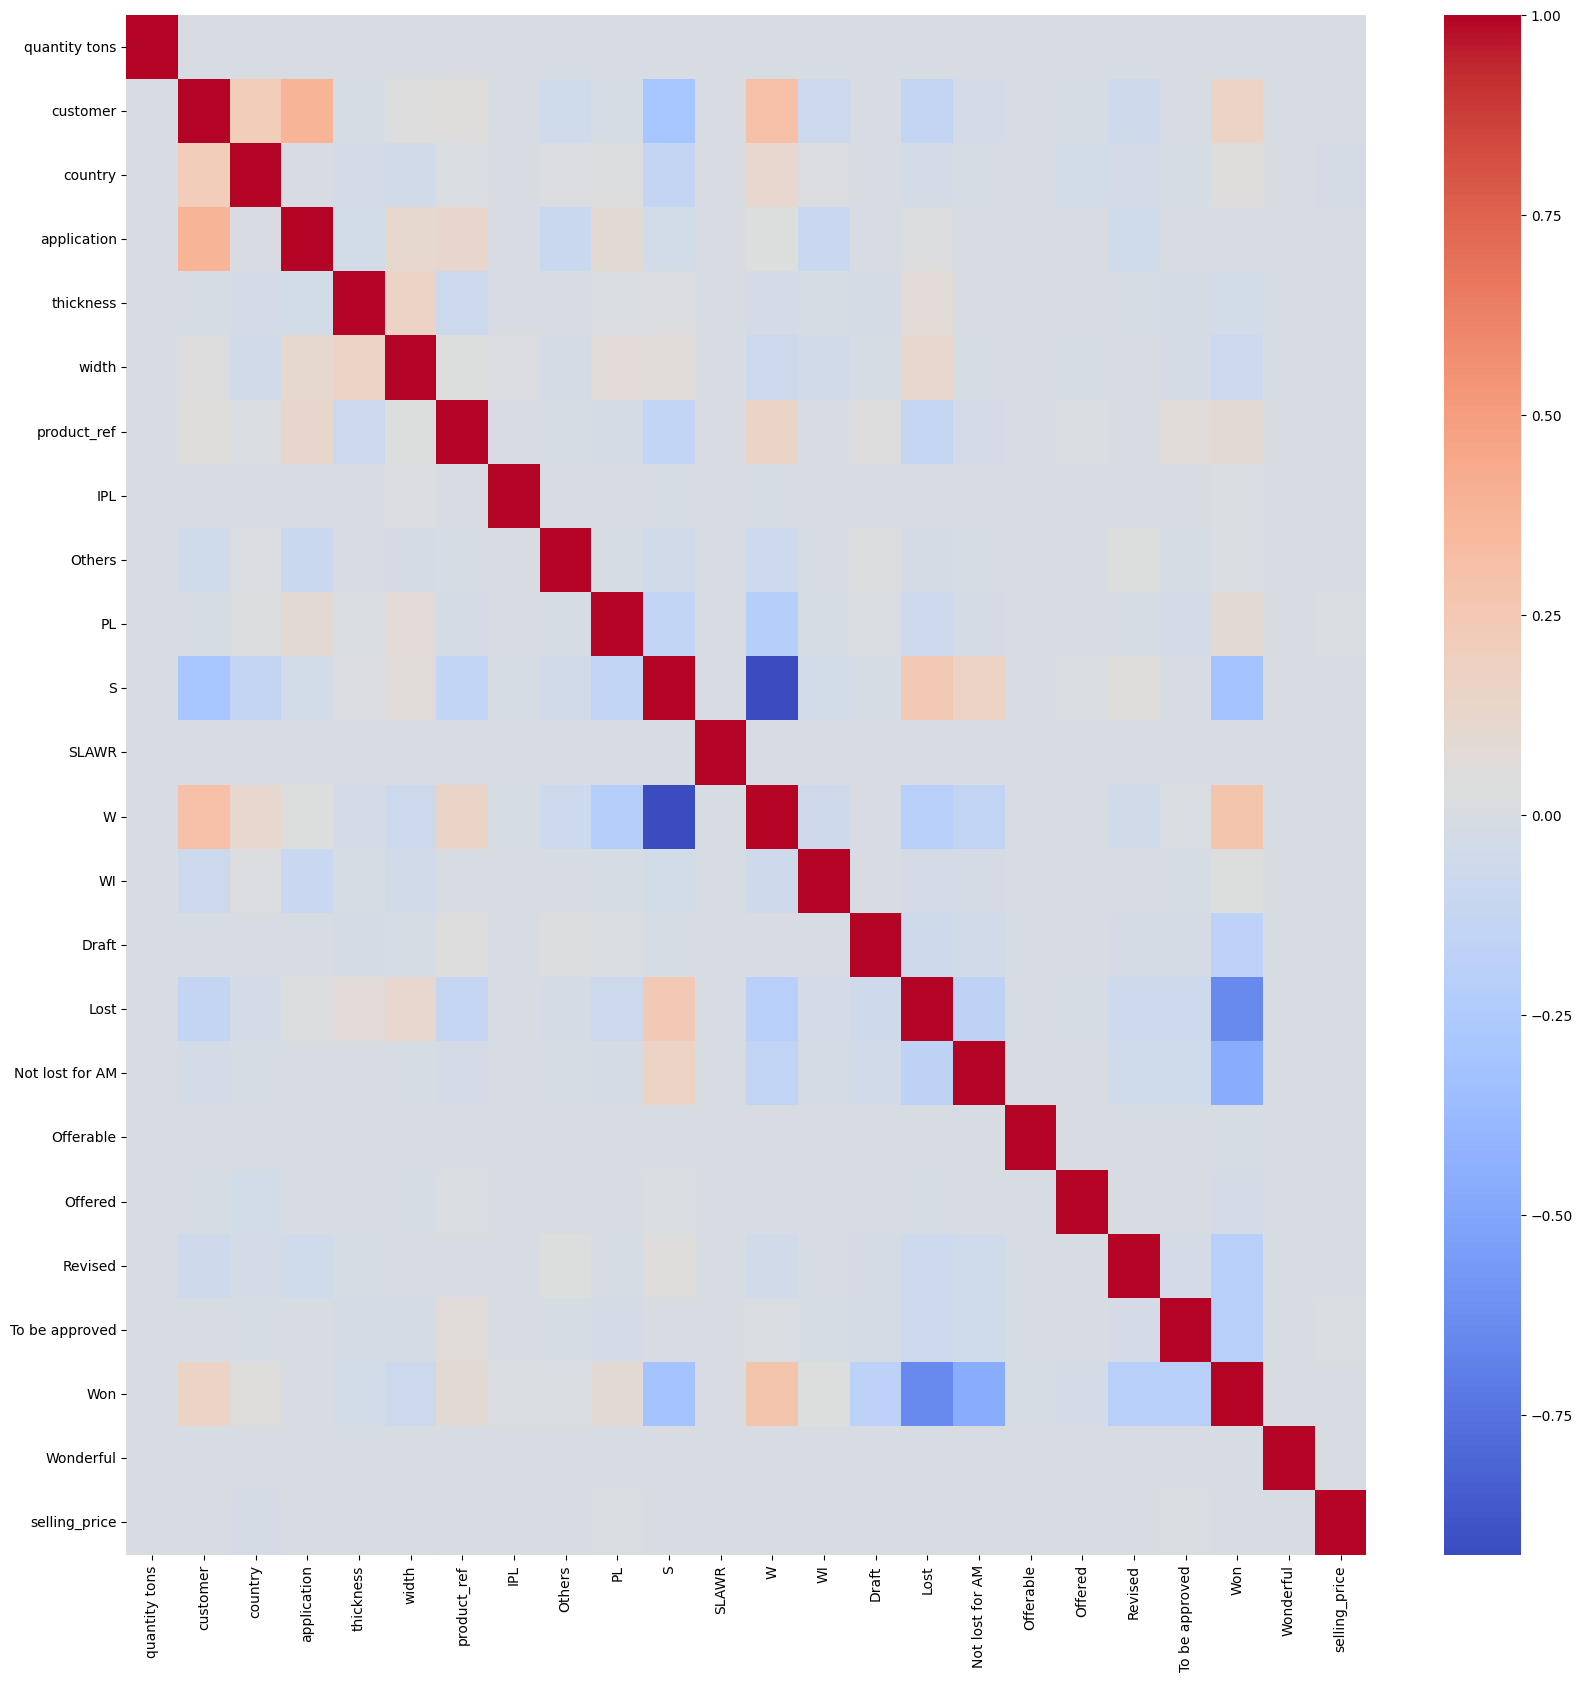

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([X,Y],axis=1).corr(),cmap=plt.cm.coolwarm)

* Heatmap showing **correlation** between different attributes.

In [81]:
# Let us analysis the selling price column
s_q1=Y.quantile(.25)
s_q3=Y.quantile(.75)
s_outliers=Y[(Y<s_q1-s_q1*1.5) | (Y>s_q3+s_q3*1.5)].shape[0]
print("Number of Outliers-->",s_outliers)

Number of Outliers--> 13


In [82]:
# As the number of Outliers is so small we can replace the outliers with the median of the data.
Y[(Y<s_q1-s_q1*1.5) | (Y>s_q3+s_q3*1.5)]=Y.median()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_13948\1914575994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[(Y<s_q1-s_q1*1.5) | (Y>s_q3+s_q3*1.5)]=Y.median()


# Model Training and Testing

In [83]:
# importing the necessary libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
scaler=StandardScaler()     #initializing the standardization object

In [85]:
# Perform test_train split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [86]:
# Standardize the dataset
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#   Ridge Regression Model

In [87]:
# Importing required libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [88]:
# Initializing different values of alpha
alpha=np.logspace(start=np.log10(0.001),stop=np.log10(100),endpoint=True,num=50)
# Initializing the hyperparameters
grid_para={'alpha':alpha}
# Initializing the gridsearchcv object
reg_cv=GridSearchCV(estimator=Ridge(),param_grid=grid_para,cv=5,scoring='neg_mean_squared_error')
# Fit the model 
reg_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8....
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [89]:
# Getting the best value of alpha
best_alpha=reg_cv.best_params_['alpha']

In [90]:
# Training the model with the best value of alpha
final_model=Ridge(alpha=best_alpha)
# Fit the test dataset
final_model.fit(X_train,Y_train)

Ridge(alpha=100.0)

In [91]:
# Get the predicted value 
predicted_value=final_model.predict(X_test)
# Getting the residual
residual=Y_test-predicted_value

Text(0.5, 1.0, 'Probability distribution of Residuals')

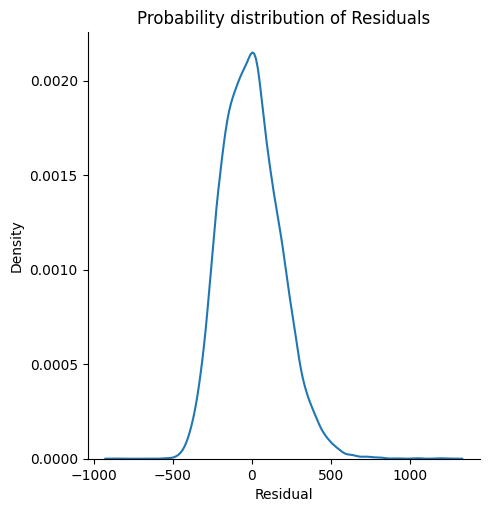

In [92]:
# Plot the residuals
sns.displot(residual,kind='kde')
plt.xlabel('Residual')
plt.title('Probability distribution of Residuals')

* The probability distribution shows that **Residuals** are forming a **Normal Distribution** with a little number of outliers

Text(0.5, 1.0, 'Actual Selling Price vs Preidcted Selling Price')

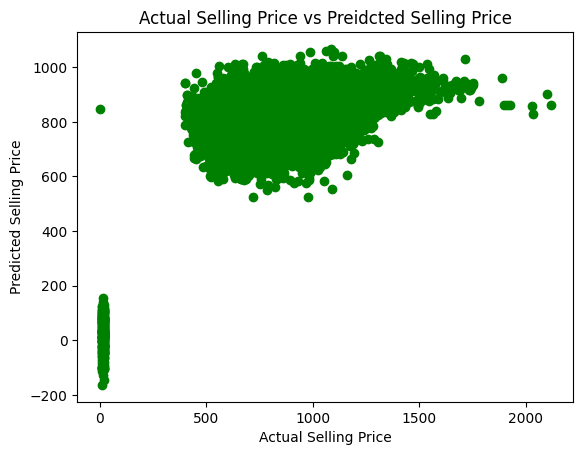

In [93]:
# Relation between predicted values and the actual values
plt.scatter(Y_test,predicted_value,color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Preidcted Selling Price")

* For small value of Selling price the **Predicted Selling Price** remained same after that as actual price increased the predicted price also increased.

Text(0.5, 1.0, 'Residual Distribution with respect to Actual value')

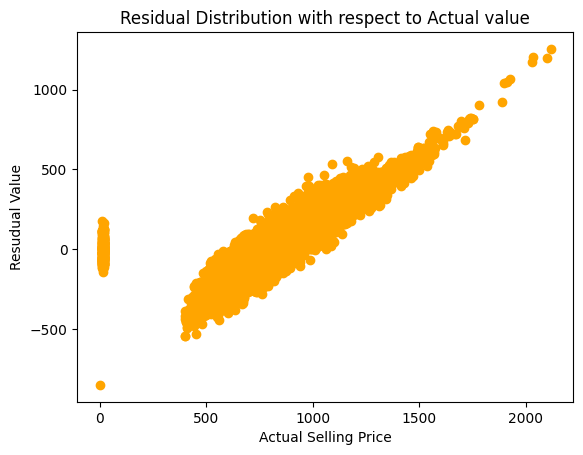

In [94]:
# Relation between Residual value and Actual value
plt.scatter(Y_test,residual,color='orange')
plt.xlabel('Actual Selling Price')
plt.ylabel('Resudual Value')
plt.title('Residual Distribution with respect to Actual value')

* The residuals are not randomly scattered around the horizontal axis, it suggests that the model does not fits well to the data.

* Above plot indicates that it does not satisfies the assumption of **homoscedasticity**.

In [95]:
print('Mean Absolute Error-->',mean_absolute_error(Y_test,predicted_value))
print('Mean Squared Error-->',mean_squared_error(Y_test,predicted_value))
print('Root Mean Squared Error-->',np.sqrt(mean_squared_error(Y_test,predicted_value)))
print('R2_Score-->',r2_score(Y_test,predicted_value))

Mean Absolute Error--> 147.22972783743654
Mean Squared Error--> 34282.38643471412
Root Mean Squared Error--> 185.1550335116875
R2_Score--> 0.3218151326652329


* Our model accuracy is just **32%**.

* Possible reasons for such behaviour are:-
    * **Overfitting**: The model is overfitting the training data, it may perform poorly on the test data, resulting in a negative R2_score value.
    * **Non-linear relationship between features and target**: There is a non-linear relationship between the features and the target variable, a linear model may not be able to capture it, resulting in a negative R2_score value.
    * **Poor quality data**: If the data is noisy or contains outliers, it may be difficult for the model to fit the data well, resulting in a negative R2_score value.

* To better fit the data and capture relations between features we will explore other models.

#   Decision Tree Regression Model

In [96]:
# Importing the required library
from sklearn.tree import DecisionTreeRegressor

In [97]:
decision_reg_cv=DecisionTreeRegressor()     # Creating decision tree with default parameters
decision_reg_cv.fit(X_train,Y_train)        # Fitting the model

DecisionTreeRegressor()

In [98]:
# The default parameters of the tree are:-
decision_reg_cv.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [99]:
predicted_value=decision_reg_cv.predict(X_test)     # Predicting the values 

In [100]:
residual=Y_test-predicted_value     # Residual

Text(0.5, 1.0, 'Probability distribution of Residuals')

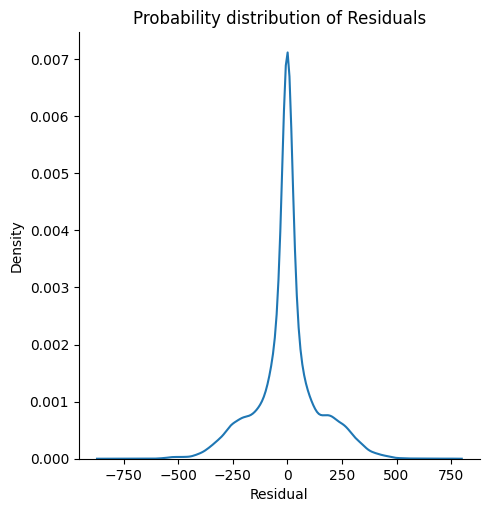

In [101]:
# Plot the residuals
sns.displot(residual,kind='kde')
plt.xlabel('Residual')
plt.title('Probability distribution of Residuals')

* The normal distribution of the residual values indicates that the errors are **normally** distributed, or in other words, that the model's predictions are **unbiased**.

Text(0.5, 1.0, 'Actual Selling Price vs Preidcted Selling Price')

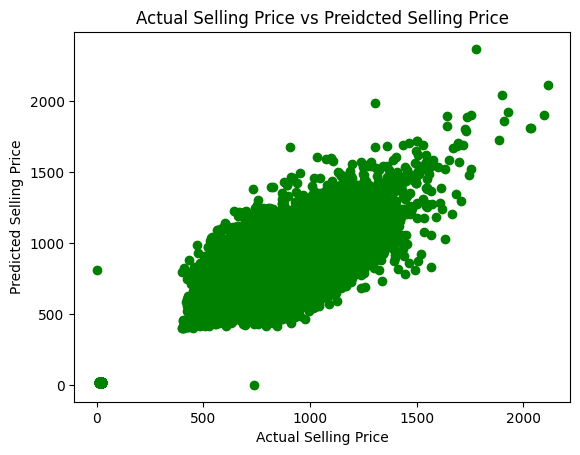

In [102]:
# Relation between predicted values and the actual values
plt.scatter(Y_test,predicted_value,color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Preidcted Selling Price")

* A positive relationship between the predicted and actual values in a statistical model indicates that the model's predictions are relatively accurate. It suggests that as the actual values increase, the predicted values also tend to increase.

Text(0.5, 1.0, 'Residual Distribution with respect to Actual value')

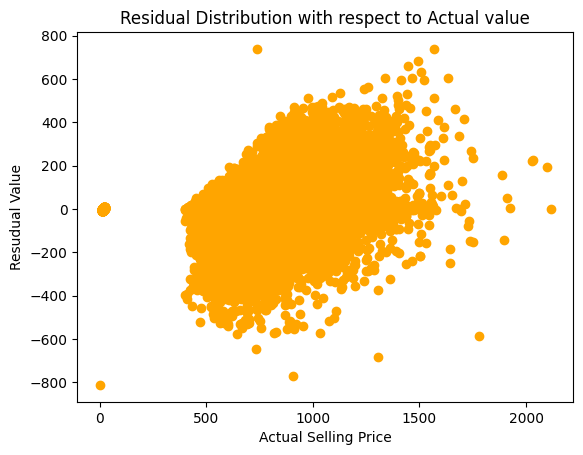

In [103]:
# Relation between Residual value and Actual value
plt.scatter(Y_test,residual,color='orange')
plt.xlabel('Actual Selling Price')
plt.ylabel('Resudual Value')
plt.title('Residual Distribution with respect to Actual value')

* A positive relationship between actual value and residual value indicates that the model tends to **underestimate** the dependent variable for **lower values** and **overestimate it** for **higher values**. This suggests that the model may have a **bias** or a systematic error in its predictions.

In [104]:
print('Mean Absolute Error-->',mean_absolute_error(Y_test,predicted_value))
print('Mean Squared Error-->',mean_squared_error(Y_test,predicted_value))
print('Root Mean Squared Error-->',np.sqrt(mean_squared_error(Y_test,predicted_value)))
print('R2_Score-->',r2_score(Y_test,predicted_value))

Mean Absolute Error--> 94.03575944398943
Mean Squared Error--> 20160.324542381564
Root Mean Squared Error--> 141.98705765801884
R2_Score--> 0.6011821682472991


* Accuracy of model is **60%**. We can furthur optimise the accuracy by hypertuning the parameters. 

In [105]:
parameters={
            "splitter":["best","random"],
            "max_depth" : [13,15,17,19,21,None],
            "min_samples_leaf":[1,2,3,4,5,6],
            "max_features":["log2","sqrt"]
        }

In [106]:
decision_tree_reg=DecisionTreeRegressor()

In [107]:
random_tree_reg=RandomizedSearchCV(estimator=decision_tree_reg,param_distributions=parameters,cv=4,scoring='neg_mean_squared_error')

In [108]:
random_tree_reg.fit(X_train,Y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [13, 15, 17, 19, 21, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [109]:
# Best parameter for decision tree
random_tree_reg.best_params_

{'splitter': 'best',
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': None}

In [110]:
# Creating decision tree with best parameters
decision_reg_cv=DecisionTreeRegressor(splitter='best',min_samples_leaf=2,max_features='log2',max_depth=19)     
decision_reg_cv.fit(X_train,Y_train)        # Fitting the model

DecisionTreeRegressor(max_depth=19, max_features='log2', min_samples_leaf=2)

In [111]:
predicted_value=decision_reg_cv.predict(X_test)

In [112]:
residual=Y_test-predicted_value

Text(0.5, 1.0, 'Probability distribution of Residuals')

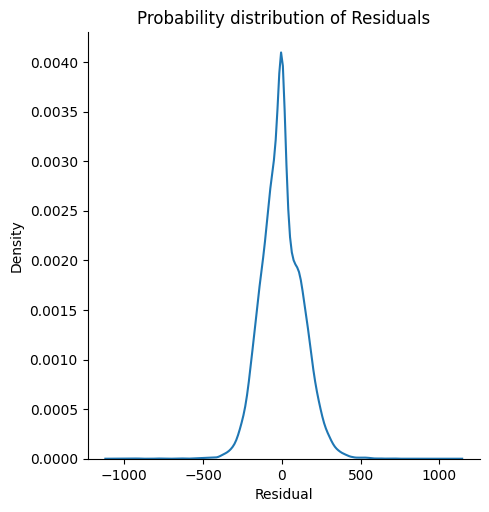

In [113]:
# Plot the residuals
sns.displot(residual,kind='kde')
plt.xlabel('Residual')
plt.title('Probability distribution of Residuals')

* The normal distribution of the residual values indicates that the errors are **normally** distributed, or in other words, that the model's predictions are **unbiased**.

Text(0.5, 1.0, 'Actual Selling Price vs Preidcted Selling Price')

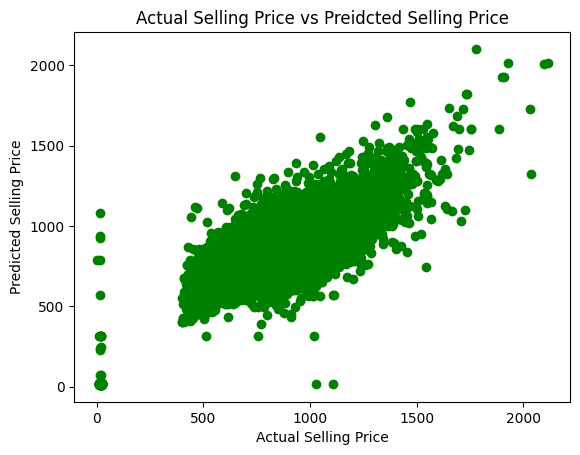

In [114]:
# Relation between predicted values and the actual values
plt.scatter(Y_test,predicted_value,color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Preidcted Selling Price")

* A positive relationship between the predicted and actual values in a statistical model indicates that the model's predictions are relatively accurate. It suggests that as the actual values increase, the predicted values also tend to increase.

Text(0.5, 1.0, 'Residual Distribution with respect to Actual value')

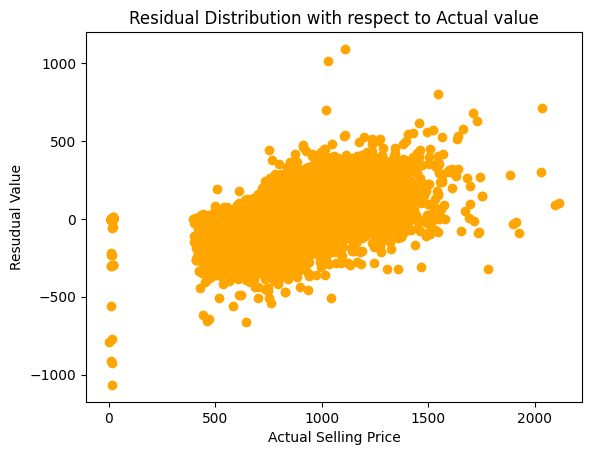

In [115]:
# Relation between Residual value and Actual value
plt.scatter(Y_test,residual,color='orange')
plt.xlabel('Actual Selling Price')
plt.ylabel('Resudual Value')
plt.title('Residual Distribution with respect to Actual value')

* A positive relationship between actual value and residual value indicates that the model tends to **underestimate** the dependent variable for **lower values** and **overestimate it** for **higher values**. This suggests that the model may have a **bias** or a systematic error in its predictions.

* The above relation has been optimised after the **hyperparameter tuning** as the results are now more distributed around horizontal line.

In [116]:
print('Mean Absolute Error-->',mean_absolute_error(Y_test,predicted_value))
print('Mean Squared Error-->',mean_squared_error(Y_test,predicted_value))
print('Root Mean Squared Error-->',np.sqrt(mean_squared_error(Y_test,predicted_value)))
print('R2_Score-->',r2_score(Y_test,predicted_value))

Mean Absolute Error--> 98.96488508560816
Mean Squared Error--> 16777.469264959946
Root Mean Squared Error--> 129.52787061076833
R2_Score--> 0.6681028670702902


* Accuracy of the model now is approx **65%** which is an **increament** bt **5%** in the accuracy after **Hyperparameter tuning**.

* The accuracy of our predictive model has improved by using **Decision Tree** but it has still not given us desirable results because of the following reasons:-
    * **Overfitting**
    * **Non-linear relationships**
    * **Outliers**
    * **Insufficient data**

* To obtain better results we will use complex model that can identify the underlying complex relation between attributes.

# Randomforest Regressor Model

In [117]:
# Importing the required model
from sklearn.ensemble import RandomForestRegressor

In [118]:
random_reg=RandomForestRegressor()  # Creating a object

In [119]:
random_reg.fit(X_train,Y_train) # Fitting the data with default parameters

RandomForestRegressor()

In [120]:
predicted_value=random_reg.predict(X_test)

In [121]:
residual=Y_test-predicted_value

Text(0.5, 1.0, 'Probability distribution of Residuals')

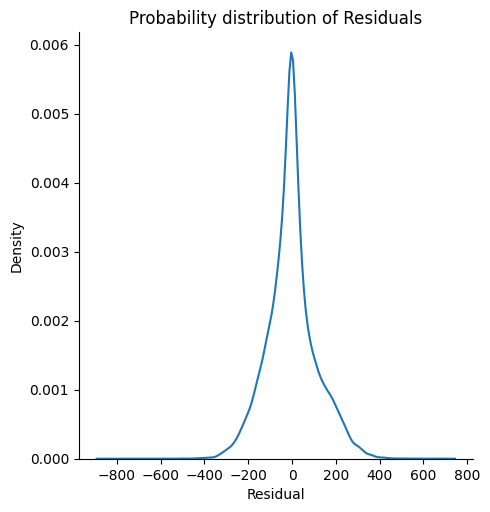

In [122]:
# Plot the residuals
sns.displot(residual,kind='kde')
plt.xlabel('Residual')
plt.title('Probability distribution of Residuals')

* The normal distribution of the residuals indicate that the **error** is normally distributed. It mean that model is **unbiased** while making the prediction.

Text(0.5, 1.0, 'Actual Selling Price vs Preidcted Selling Price')

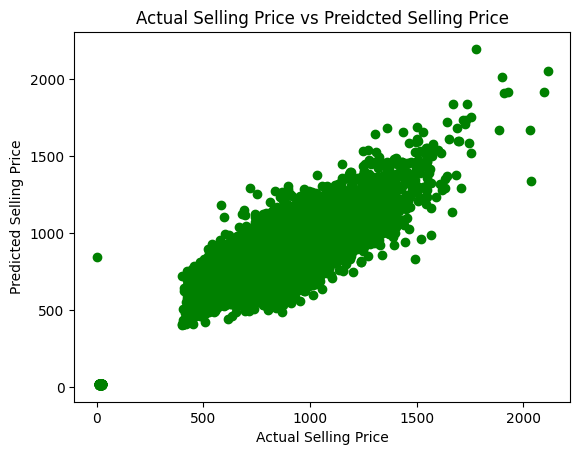

In [123]:
# Relation between predicted values and the actual values
plt.scatter(Y_test,predicted_value,color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Preidcted Selling Price")

* Positive relationship between original and predicted_value value is that model is doing good job in making prediction . As the Original value is increasing the predicted value is also increasing resulting in less error.

Text(0.5, 1.0, 'Residual Distribution with respect to Actual value')

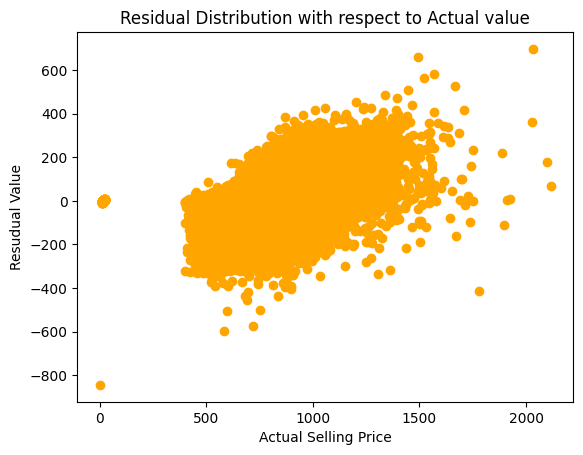

In [124]:
# Relation between Residual value and Actual value
plt.scatter(Y_test,residual,color='orange')
plt.xlabel('Actual Selling Price')
plt.ylabel('Resudual Value')
plt.title('Residual Distribution with respect to Actual value')

* A positive relationship between actual value and residual value indicates that the model tends to **underestimate** the dependent variable for **lower values** and **overestimate it** for **higher values**. This suggests that the model may have a **bias** or a systematic error in its predictions.

In [125]:
print('Mean Absolute Error-->',mean_absolute_error(Y_test,predicted_value))
print('Mean Squared Error-->',mean_squared_error(Y_test,predicted_value))
print('Root Mean Squared Error-->',np.sqrt(mean_squared_error(Y_test,predicted_value)))
print('R2_Score-->',r2_score(Y_test,predicted_value))

Mean Absolute Error--> 81.46265005732232
Mean Squared Error--> 12525.784590889223
Root Mean Squared Error--> 111.91865166668701
R2_Score--> 0.7522110201629867


* Accuracy of the Randomforest with default parameter is **75%** we can furthur improve the accuracy by **Hyperparameter Tuning**.

In [126]:
# parameters
param_dist = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [9,10,11],
            'min_samples_leaf': [8,9,10,11]
        }

In [127]:
rf=RandomForestRegressor()      # Creating object 

In [128]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=50,cv=5,random_state=42,n_jobs=-1) # Model creation

In [143]:
score=[]
for i in range(1,11):
    rf=RandomForestRegressor(min_samples_leaf=i)
    rf.fit(X_train,Y_train)
    score.append(rf.score(X_test,Y_test))
print(score)

[0.7512380881556933, 0.7613237912385269, 0.7626699144858127, 0.7619598873013479, 0.7606863218648112, 0.7585458212904048, 0.7563696278901142, 0.7541198818584414, 0.7518196749647865, 0.7492295365086077]


In [146]:
score=[]
for i in range(2,81,4):
    rf=RandomForestRegressor(min_samples_split=i)
    rf.fit(X_train,Y_train)
    score.append(rf.score(X_test,Y_test))
print(score)

[0.7516961747218809, 0.7622767137143848, 0.7668848575919838, 0.7661172848153827, 0.7645919193587654, 0.7631737593261735, 0.76089394369739, 0.7582500559086104, 0.7560348097763945, 0.7538062119552409, 0.7520435606957702, 0.7495339244822443, 0.7471210255811205, 0.7441113806771806, 0.7428845078666075, 0.7409048888378282, 0.7388002344634965, 0.7368273849593394, 0.7352287523174055, 0.7326848607470662]


In [147]:
score=[]
for i in range(10,20,2):
    rf=RandomForestRegressor(max_depth=i)
    rf.fit(X_train,Y_train)
    score.append(rf.score(X_test,Y_test))
print(score)

[0.631062532773446, 0.6742822190781885, 0.7115891887158592, 0.7387110886166243, 0.755214859046857]


In [148]:
score=[]
for i in range(50,201,50):
    rf=RandomForestRegressor(n_estimators=i)
    rf.fit(X_train,Y_train)
    score.append(rf.score(X_test,Y_test))
print(score)

[0.7492862178282238, 0.7512691172451167, 0.7526504942969373, 0.7524805919603538]


* Hyperparameter Tuned model.

In [153]:
rf=RandomForestRegressor(n_estimators=200,min_samples_leaf=3,min_samples_split=9,max_depth=None)

In [154]:
rf.fit(X_train,Y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=9, n_estimators=200)

In [156]:
predicted_value=rf.predict(X_test)

In [157]:
residual=Y_test-predicted_value

Text(0.5, 1.0, 'Probability distribution of Residuals')

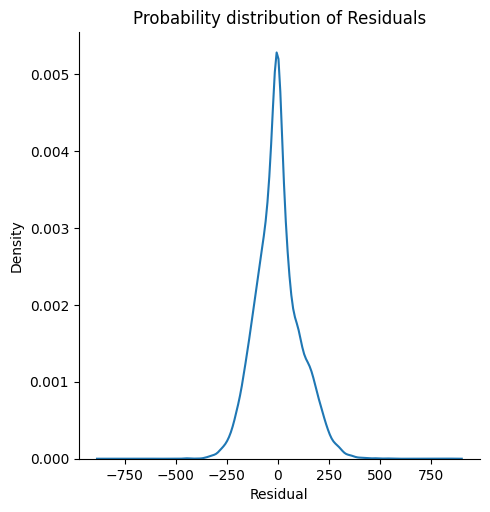

In [158]:
# Plot the residuals
sns.displot(residual,kind='kde')
plt.xlabel('Residual')
plt.title('Probability distribution of Residuals')

* **Normal Distribution** of the residuals.

Text(0.5, 1.0, 'Actual Selling Price vs Preidcted Selling Price')

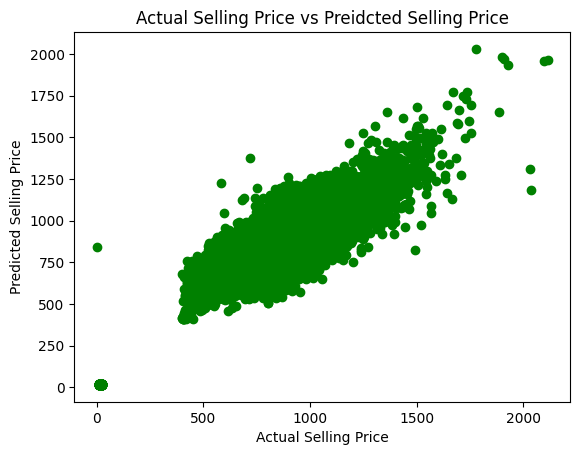

In [159]:
# Relation between predicted values and the actual values
plt.scatter(Y_test,predicted_value,color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Preidcted Selling Price")

* Positive relation between the original and predicted value.

Text(0.5, 1.0, 'Residual Distribution with respect to Actual value')

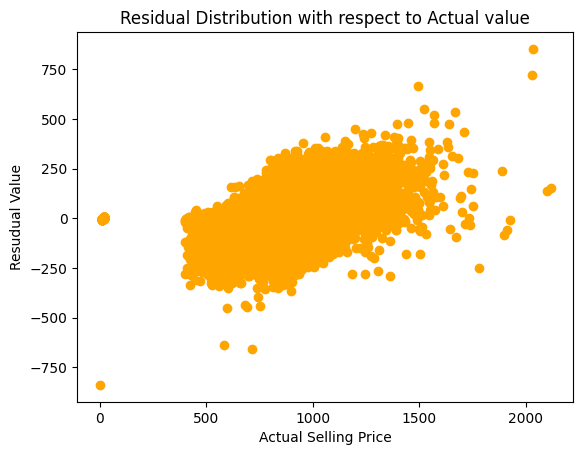

In [160]:
# Relation between Residual value and Actual value
plt.scatter(Y_test,residual,color='orange')
plt.xlabel('Actual Selling Price')
plt.ylabel('Resudual Value')
plt.title('Residual Distribution with respect to Actual value')

* Some kind of **Positive Relation** between original price and residual which indicated that model can be furthur optimised.

In [161]:
print('Mean Absolute Error-->',mean_absolute_error(Y_test,predicted_value))
print('Mean Squared Error-->',mean_squared_error(Y_test,predicted_value))
print('Root Mean Squared Error-->',np.sqrt(mean_squared_error(Y_test,predicted_value)))
print('R2_Score-->',r2_score(Y_test,predicted_value))

Mean Absolute Error--> 82.16706477730123
Mean Squared Error--> 11925.427883346945
Root Mean Squared Error--> 109.20360746489534
R2_Score--> 0.7640874639115414


* After hypertuning the accuracy of the model is increased by **2%**.

* To learn more complex behaviour we will use **ANN**.

# Artificial Neural Network

In [139]:
# Importing the required library
import tensorflow as tf

* We will use the **Keras Sequential API** for the model creation

In [ ]:
# 1.Create the model
model_0=tf.keras.Sequential([
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_0.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["mae"]
)

# Fit the model
model_0.fit(X_train,Y_train,epochs=20)

Epoch 1/20
5110/5110 [==============================] - 20s 4ms/step - loss: 679.9860 - mae: 679.9860
Epoch 2/20
5110/5110 [==============================] - 20s 4ms/step - loss: 420.1345 - mae: 420.1345
Epoch 3/20
5110/5110 [==============================] - 20s 4ms/step - loss: 219.2229 - mae: 219.2229
Epoch 4/20
5110/5110 [==============================] - 19s 4ms/step - loss: 161.3851 - mae: 161.3851
Epoch 5/20
5110/5110 [==============================] - 20s 4ms/step - loss: 149.7777 - mae: 149.7777
Epoch 6/20
5110/5110 [==============================] - 23s 5ms/step - loss: 142.7955 - mae: 142.7955
Epoch 7/20
5110/5110 [==============================] - 22s 4ms/step - loss: 139.0672 - mae: 139.0672
Epoch 8/20
5110/5110 [==============================] - 19s 4ms/step - loss: 137.5312 - mae: 137.5312
Epoch 9/20
5110/5110 [==============================] - 20s 4ms/step - loss: 136.3067 - mae: 136.3067
Epoch 10/20
5110/5110 [==============================] - 21s 4ms/step - loss: 135.

In [ ]:
model_0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                600       
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Epoch vs Mae')

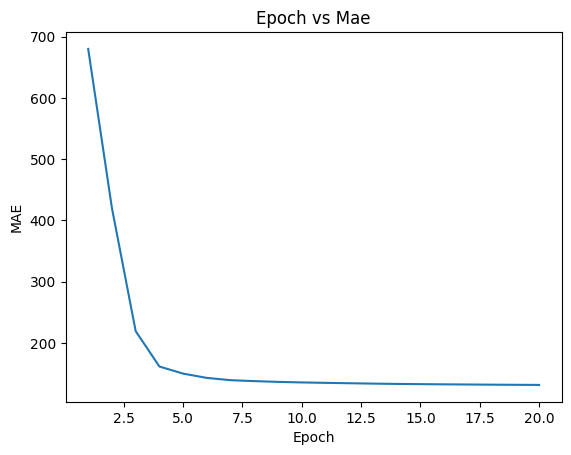

In [ ]:
plt.plot([x for x in range(1,21)],model_0.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [ ]:
# Calculating the accuracy of the trained neural network
predicted_value=model_0.predict(X_test)
print("R2_Score-->",r2_score(Y_test,predicted_value))

568/568 [==============================] - 1s 2ms/step
R2_Score--> 0.4628228721150861


* Our **ANN** Model accuracy is just **46%** which is even worse than the randomforest model.The Possible reasons are mentioned below. We can improve furthur by doing hyperparameter tuning.

* Possible options for hypertuning:-
    * **Adjusting learning rate**: Learning rate is an important hyperparameter that controls the step size at each iteration while moving toward a minimum of a loss function. We can try different values of learning rates to see how it affects the model performance. For instance, We can try a smaller learning rate, such as 0.001, or a larger learning rate, such as 0.01, to see if it improves the model's accuracy and reduces the loss.
    * **Changing activation functions**: In this model, We are using the ReLU activation function for all hidden layers. However, other activation functions such as sigmoid, tanh, or LeakyReLU may perform better for certain problems. Experimenting with different activation functions can help us find the one that works best for your data.
    * **Adding dropout regularization**: Overfitting is a common problem in machine learning models. Adding dropout regularization can prevent overfitting by randomly dropping out some nodes in the network during training. We can try different dropout rates, such as 0.1, 0.2, or 0.5, to see how it affects the model performance.
    * **Changing the number of hidden layers and neurons**: The number of hidden layers and neurons can have a significant impact on the model's performance. We can try adding more hidden layers or increasing the number of neurons in each layer to see if it improves the model's accuracy.
    * **Trying different optimizers**: The Adam optimizer is a popular choice for training deep learning models. However, other optimizers such as **Stochastic Gradient Descent** (SGD) or **RMSprop** may perform better for certain problems. We can try different optimizers to see if it improves the model's accuracy and reduces the loss.

In [ ]:
# 1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["mae"]
)

# Fit the model
model_1.fit(X_train,Y_train,epochs=20)

Epoch 1/20
5110/5110 [==============================] - 20s 4ms/step - loss: 259.4313 - mae: 259.4313
Epoch 2/20
5110/5110 [==============================] - 19s 4ms/step - loss: 127.0349 - mae: 127.0349
Epoch 3/20
5110/5110 [==============================] - 20s 4ms/step - loss: 123.1284 - mae: 123.1284
Epoch 4/20
5110/5110 [==============================] - 20s 4ms/step - loss: 121.3261 - mae: 121.3261
Epoch 5/20
5110/5110 [==============================] - 21s 4ms/step - loss: 120.1799 - mae: 120.1799
Epoch 6/20
5110/5110 [==============================] - 21s 4ms/step - loss: 119.5455 - mae: 119.5455
Epoch 7/20
5110/5110 [==============================] - 20s 4ms/step - loss: 118.9979 - mae: 118.9979
Epoch 8/20
5110/5110 [==============================] - 20s 4ms/step - loss: 118.4906 - mae: 118.4906
Epoch 9/20
5110/5110 [==============================] - 20s 4ms/step - loss: 118.1748 - mae: 118.1748
Epoch 10/20
5110/5110 [==============================] - 21s 4ms/step - loss: 117.

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 25)                600       
                                                                 
 dense_15 (Dense)            (None, 25)                650       
                                                                 
 dense_16 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Epoch vs Mae')

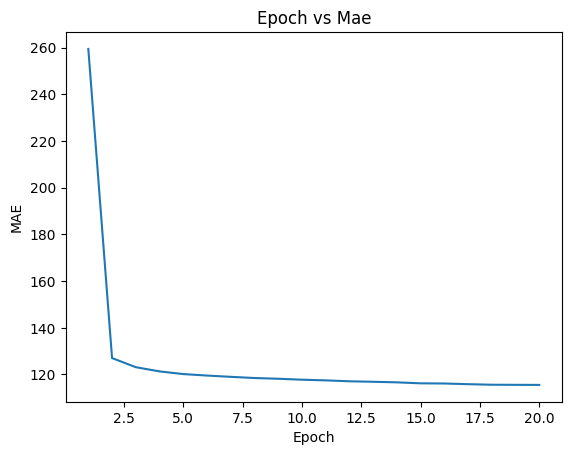

In [ ]:
plt.plot([x for x in range(1,21)],model_1.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [ ]:
predicted_values=model_1.predict(X_test)   #Predicting the values

568/568 [==============================] - 1s 2ms/step


In [ ]:
print("Accuracy-->",r2_score(Y_test,predicted_value))

Accuracy--> 0.4628228721150861


In [ ]:
# 1.Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["mae"]
)

# Fit the model
model_2.fit(X_train,Y_train,epochs=20)

Epoch 1/20
5110/5110 [==============================] - 24s 4ms/step - loss: 253.9631 - mae: 253.9631
Epoch 2/20
5110/5110 [==============================] - 22s 4ms/step - loss: 151.9552 - mae: 151.9552
Epoch 3/20
5110/5110 [==============================] - 23s 5ms/step - loss: 149.6159 - mae: 149.6159
Epoch 4/20
5110/5110 [==============================] - 23s 5ms/step - loss: 148.1681 - mae: 148.1681
Epoch 5/20
5110/5110 [==============================] - 23s 5ms/step - loss: 146.8864 - mae: 146.8864
Epoch 6/20
5110/5110 [==============================] - 25s 5ms/step - loss: 146.0708 - mae: 146.0708
Epoch 7/20
5110/5110 [==============================] - 22s 4ms/step - loss: 144.8501 - mae: 144.8501
Epoch 8/20
5110/5110 [==============================] - 22s 4ms/step - loss: 144.3537 - mae: 144.3537
Epoch 9/20
5110/5110 [==============================] - 23s 4ms/step - loss: 143.3008 - mae: 143.3008
Epoch 10/20
5110/5110 [==============================] - 22s 4ms/step - loss: 142.

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 25)                600       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_18 (Dense)            (None, 25)                650       
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Epoch vs Mae')

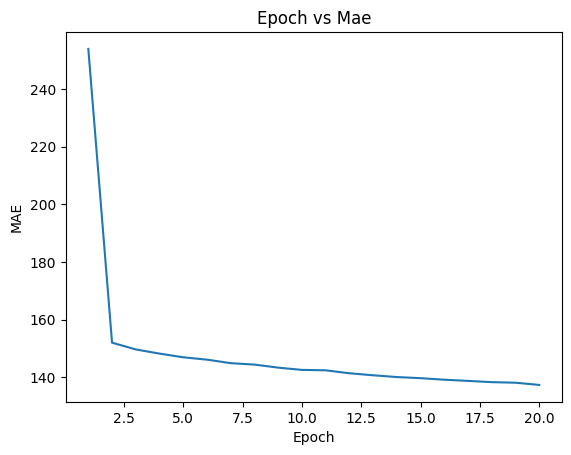

In [ ]:
plt.plot([x for x in range(1,21)],model_2.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [ ]:
predicted_value=model_2.predict(X_test)

568/568 [==============================] - 1s 2ms/step


In [ ]:
print("Accuracy-->",r2_score(Y_test,predicted_value))

Accuracy--> 0.5108369904475145


In [ ]:
# 1.Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="sigmoid"),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(50,activation="sigmoid"),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# Fit the model
model_2.fit(X_train,Y_train,epochs=25)

Epoch 1/25
5110/5110 [==============================] - 23s 4ms/step - loss: 170.8681 - mae: 170.8681
Epoch 2/25
5110/5110 [==============================] - 24s 5ms/step - loss: 147.1201 - mae: 147.1201
Epoch 3/25
5110/5110 [==============================] - 22s 4ms/step - loss: 145.3332 - mae: 145.3332
Epoch 4/25
5110/5110 [==============================] - 22s 4ms/step - loss: 142.3444 - mae: 142.3444
Epoch 5/25
5110/5110 [==============================] - 21s 4ms/step - loss: 141.1588 - mae: 141.1588
Epoch 6/25
5110/5110 [==============================] - 21s 4ms/step - loss: 139.5598 - mae: 139.5598
Epoch 7/25
5110/5110 [==============================] - 21s 4ms/step - loss: 138.7254 - mae: 138.7254
Epoch 8/25
5110/5110 [==============================] - 21s 4ms/step - loss: 138.8367 - mae: 138.8367
Epoch 9/25
5110/5110 [==============================] - 22s 4ms/step - loss: 137.0350 - mae: 137.0350
Epoch 10/25
5110/5110 [==============================] - 22s 4ms/step - loss: 136.

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                1200      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,801
Trainable params: 3,801
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Epoch vs Mae')

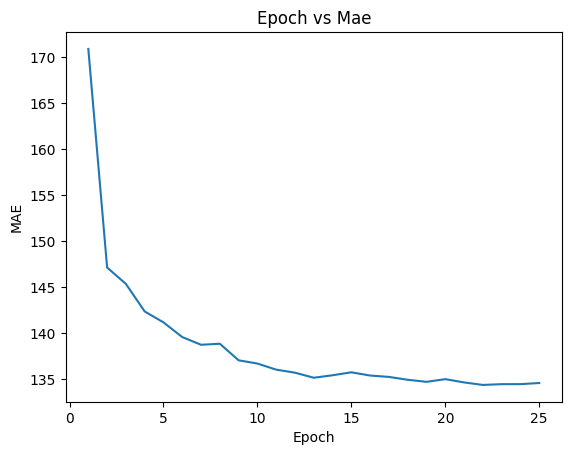

In [ ]:
plt.plot([x for x in range(1,26)],model_2.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [ ]:
predicted_value=model_2.predict(X_test)
print("Accuracy-->",r2_score(Y_test,predicted_value))

568/568 [==============================] - 2s 2ms/step
Accuracy--> 0.48451964611925014


In [140]:
# 1.Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="tanh"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(50,activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.025),
    metrics=["mae"]
)

# Fit the model
model_3.fit(X_train,Y_train,epochs=25)

Epoch 1/25
5110/5110 [==============================] - 33s 6ms/step - loss: 226.6309 - mae: 226.6309
Epoch 2/25
5110/5110 [==============================] - 30s 6ms/step - loss: 171.0731 - mae: 171.0731
Epoch 3/25
5110/5110 [==============================] - 27s 5ms/step - loss: 171.0593 - mae: 171.0593
Epoch 4/25
5110/5110 [==============================] - 28s 6ms/step - loss: 171.0702 - mae: 171.0702
Epoch 5/25
5110/5110 [==============================] - 29s 6ms/step - loss: 171.0795 - mae: 171.0795
Epoch 6/25
5110/5110 [==============================] - 27s 5ms/step - loss: 170.8999 - mae: 170.8999
Epoch 7/25
5110/5110 [==============================] - 27s 5ms/step - loss: 170.0724 - mae: 170.0724
Epoch 8/25
5110/5110 [==============================] - 27s 5ms/step - loss: 167.6858 - mae: 167.6858
Epoch 9/25
5110/5110 [==============================] - 27s 5ms/step - loss: 166.2539 - mae: 166.2539
Epoch 10/25
5110/5110 [==============================] - 27s 5ms/step - loss: 165.

Text(0.5, 1.0, 'Epoch vs Mae')

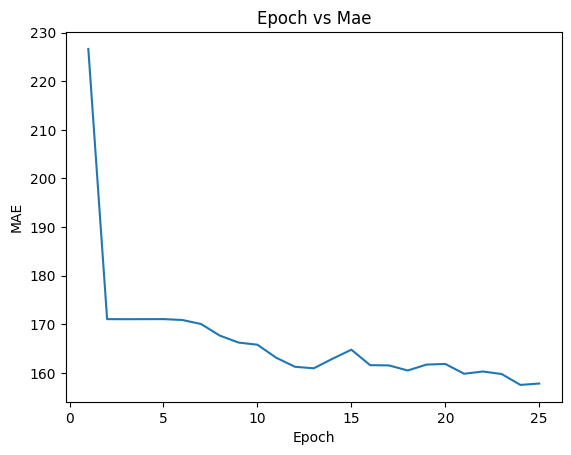

In [141]:
plt.plot([x for x in range(1,26)],model_3.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [142]:
predicted_value=model_3.predict(X_test)
print("Accuracy-->",r2_score(Y_test,predicted_value))

568/568 [==============================] - 3s 3ms/step
Accuracy--> 0.15275904963013132


In [162]:
# 1.Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=["mae"]
)

# Fit the model
model_4.fit(X_train,Y_train,epochs=25)

Epoch 1/25
5110/5110 [==============================] - 23s 4ms/step - loss: 181.0606 - mae: 181.0606
Epoch 2/25
5110/5110 [==============================] - 21s 4ms/step - loss: 138.4949 - mae: 138.4949
Epoch 3/25
5110/5110 [==============================] - 21s 4ms/step - loss: 137.4693 - mae: 137.4693
Epoch 4/25
5110/5110 [==============================] - 21s 4ms/step - loss: 136.8505 - mae: 136.8505
Epoch 5/25
5110/5110 [==============================] - 25s 5ms/step - loss: 136.2046 - mae: 136.2046
Epoch 6/25
5110/5110 [==============================] - 23s 4ms/step - loss: 135.8631 - mae: 135.8631
Epoch 7/25
5110/5110 [==============================] - 21s 4ms/step - loss: 135.7838 - mae: 135.7838
Epoch 8/25
5110/5110 [==============================] - 21s 4ms/step - loss: 135.4453 - mae: 135.4453
Epoch 9/25
5110/5110 [==============================] - 21s 4ms/step - loss: 135.3424 - mae: 135.3424
Epoch 10/25
5110/5110 [==============================] - 21s 4ms/step - loss: 135.

In [163]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                600       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Epoch vs Mae')

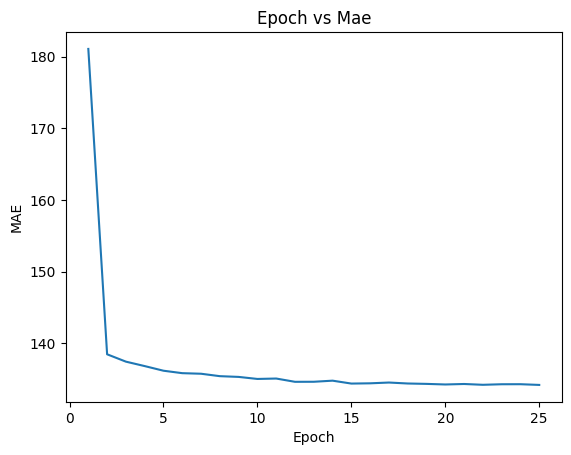

In [164]:
plt.plot([x for x in range(1,26)],model_4.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [165]:
predicted_value=model_4.predict(X_test)
print("Accuracy-->",r2_score(Y_test,predicted_value))

568/568 [==============================] - 2s 3ms/step
Accuracy--> 0.5113980087375383


In [166]:
# 1.Create the model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="sigmoid"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(50,activation="sigmoid"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=["mae"]
)

# Fit the model
model_5.fit(X_train,Y_train,epochs=50)

Epoch 1/50
5110/5110 [==============================] - 34s 6ms/step - loss: 346.7751 - mae: 346.7751
Epoch 2/50
5110/5110 [==============================] - 31s 6ms/step - loss: 173.6476 - mae: 173.6476
Epoch 3/50
5110/5110 [==============================] - 31s 6ms/step - loss: 173.8267 - mae: 173.8267
Epoch 4/50
5110/5110 [==============================] - 31s 6ms/step - loss: 162.5562 - mae: 162.5562
Epoch 5/50
5110/5110 [==============================] - 31s 6ms/step - loss: 134.6525 - mae: 134.6525
Epoch 6/50
5110/5110 [==============================] - 31s 6ms/step - loss: 131.6316 - mae: 131.6316
Epoch 7/50
5110/5110 [==============================] - 31s 6ms/step - loss: 130.7668 - mae: 130.7668
Epoch 8/50
5110/5110 [==============================] - 31s 6ms/step - loss: 129.7604 - mae: 129.7604
Epoch 9/50
5110/5110 [==============================] - 31s 6ms/step - loss: 129.2153 - mae: 129.2153
Epoch 10/50
5110/5110 [==============================] - 39s 8ms/step - loss: 128.

In [169]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1200      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_8 (Dense)             (None, 25)                650       
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_9 (Dense)             (None, 25)               

Text(0.5, 1.0, 'Epoch vs Mae')

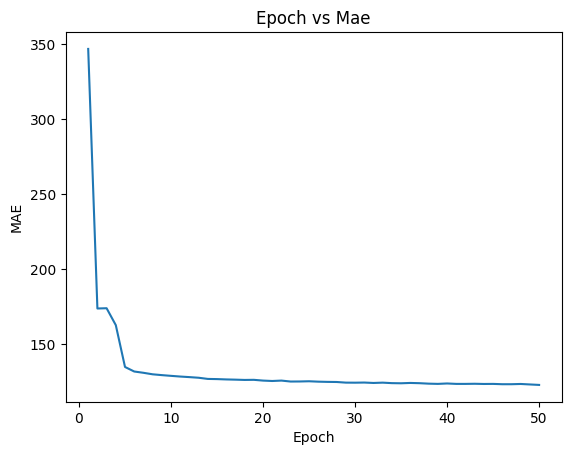

In [167]:
plt.plot([x for x in range(1,51)],model_5.history.history['mae'])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Epoch vs Mae")

In [168]:
predicted_value=model_5.predict(X_test)
print("Accuracy-->",r2_score(Y_test,predicted_value))

568/568 [==============================] - 2s 3ms/step
Accuracy--> 0.5754589011423895


In [176]:
predicted_value=np.reshape(predicted_value,newshape=(1,predicted_value.size))

In [181]:
Y_test=np.array(Y_test)

In [183]:
residual=Y_test-predicted_value

Text(0.5, 1.0, 'Actual Selling Price vs Preidcted Selling Price')

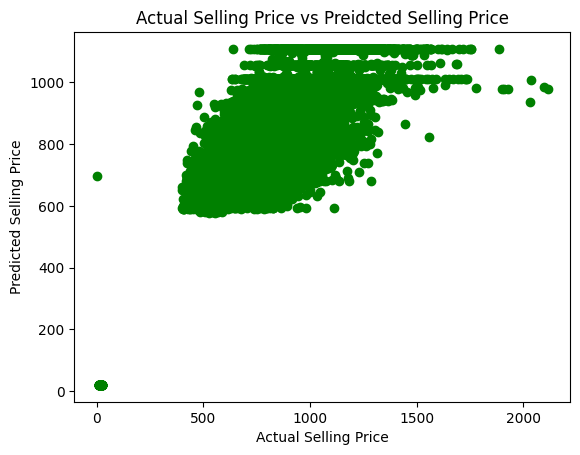

In [186]:
# Relation between predicted values and the actual values
plt.scatter(Y_test,predicted_value,color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Preidcted Selling Price")

* Positive Relation between predicted value and actual value.

Text(0.5, 1.0, 'Residual Distribution with respect to Actual value')

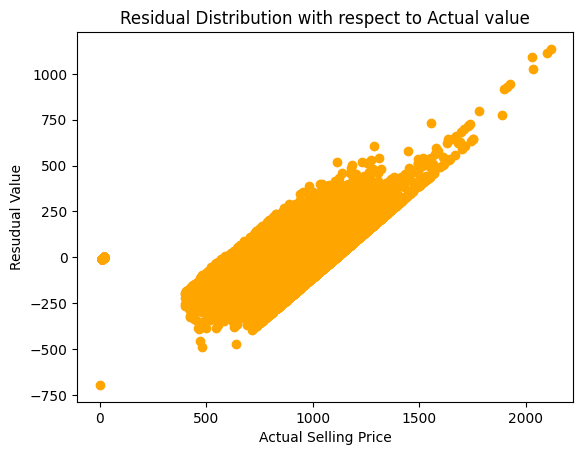

In [187]:
# Relation between Residual value and Actual value
plt.scatter(Y_test,residual,color='orange')
plt.xlabel('Actual Selling Price')
plt.ylabel('Resudual Value')
plt.title('Residual Distribution with respect to Actual value')

* Positive Relation between residual and acutal selling price.

In [200]:
Y_test =np.array(Y_test)

In [201]:
predicted_value=np.array(predicted_value)

In [203]:
predicted_value=predicted_value.flatten()

In [204]:
print('Mean Absolute Error-->',mean_absolute_error(Y_test,predicted_value))
print('Mean Squared Error-->',mean_squared_error(Y_test,predicted_value))
print('Root Mean Squared Error-->',np.sqrt(mean_squared_error(Y_test,predicted_value)))
print('R2_Score-->',r2_score(Y_test,predicted_value))

Mean Absolute Error--> 115.55012485702781
Mean Squared Error--> 21460.641057433764
Root Mean Squared Error--> 146.49450862552413
R2_Score--> 0.5754589011423895


# Model Comperison

In [210]:
mae=[147.22972783743654,98.96488508560816,82.16706477730123,115.55012485702781]
r2_s=[0.3218151326652329,0.6681028670702902,0.7640874639115414,0.5754589011423895]
models=['Ridge','DecisionTree','RandomForest','ANN']
colors=['#51b58f','#4da3b0','#295391','#852991']

Text(0.5, 1.0, 'Comperison Between MAE and Models')

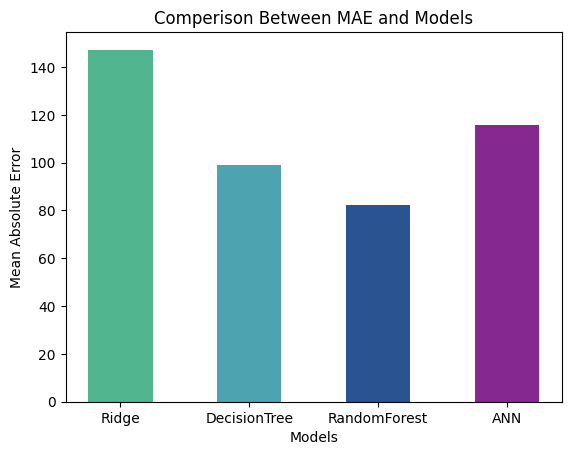

In [211]:
plt.bar(models,mae,color=colors,width=0.5)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Comperison Between MAE and Models')

* **RandomForest** Model gave the lowest Mean Absolute Error.

* **Ridge Regression** model gave the highest Mean Absolute Error.

Text(0.5, 1.0, 'Comperison Between R2_Score and Models')

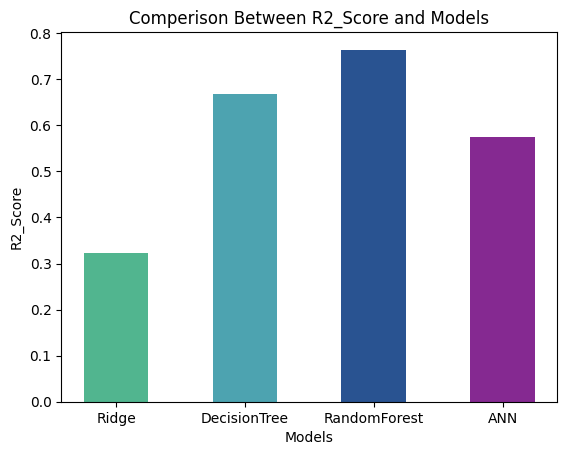

In [213]:
plt.bar(models,r2_s,color=colors,width=0.5)
plt.xlabel('Models')
plt.ylabel('R2_Score')
plt.title('Comperison Between R2_Score and Models')

* **RandomForest** Model gave the highest R2_Score.
* **Ridge Regression** model gave the lowest R2_Score.